<a href="https://colab.research.google.com/github/pipebc/tareas/blob/main/tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Felipe Barraza Carvajal | Rut: 22.072.145-0

---
# Estaturas en nuestra comuna


Muestra de tamaño 10 :
Promedio: 80.03782 
Desviación estándar: 4.175783 

Muestra de tamaño 50 :
Promedio: 81.70858 
Desviación estándar: 5.719569 

Muestra de tamaño 100 :
Promedio: 81.53104 
Desviación estándar: 5.179302 

Muestra de tamaño 1000 :
Promedio: 81.94985 
Desviación estándar: 5.389682 


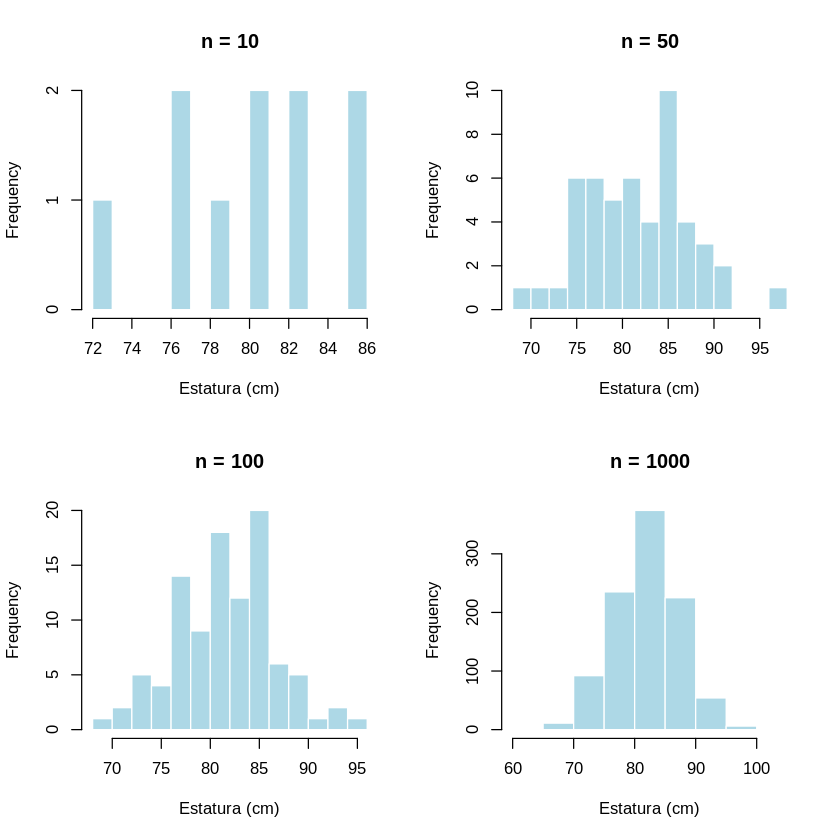

In [433]:
set.seed(4166)
media <- 82
DevEs <- 5.35

muestras <- c(10, 50, 100, 1000)

par(mfrow = c(2, 2))
for (n in muestras) {
  datos <- rnorm(n, mean = media, sd = DevEs)
  hist(datos,
       main = paste("n =", n),
       xlab = "Estatura (cm)",
       col = "lightblue", border = "white",
       breaks = 10)
  cat("\nMuestra de tamaño", n, ":\n")
  cat("Promedio:", mean(datos), "\n")
  cat("Desviación estándar:", sd(datos), "\n")
}

Al aumentar el número de muestras, los resultados convergen hacia la media y desviación real.

El médico que atendió a Carlitos que tiene 8 años, le mencionó a la madre que la estatura de su
hijo está sobre el percentil 90. ¿Podría orientarla explicando qué significado tiene esa afirmación?

In [434]:
qnorm(0.9, mean = 82, sd = 5.35)

[1] 88.8563

El percentil 90 es 88.85 cm. Carlitos está sobre esa altura, por lo que es más alto que el 90% de los niños de 8 años en su comuna.



---
# Lanzamiento de una moneda


In [435]:
n <- 20
p <- 0.5
lanzamientos_20 <- rbinom(1, n, p)
cat("Cantidad de caras en 20 lanzamientos:", lanzamientos_20, "\n")

Cantidad de caras en 20 lanzamientos: 14 


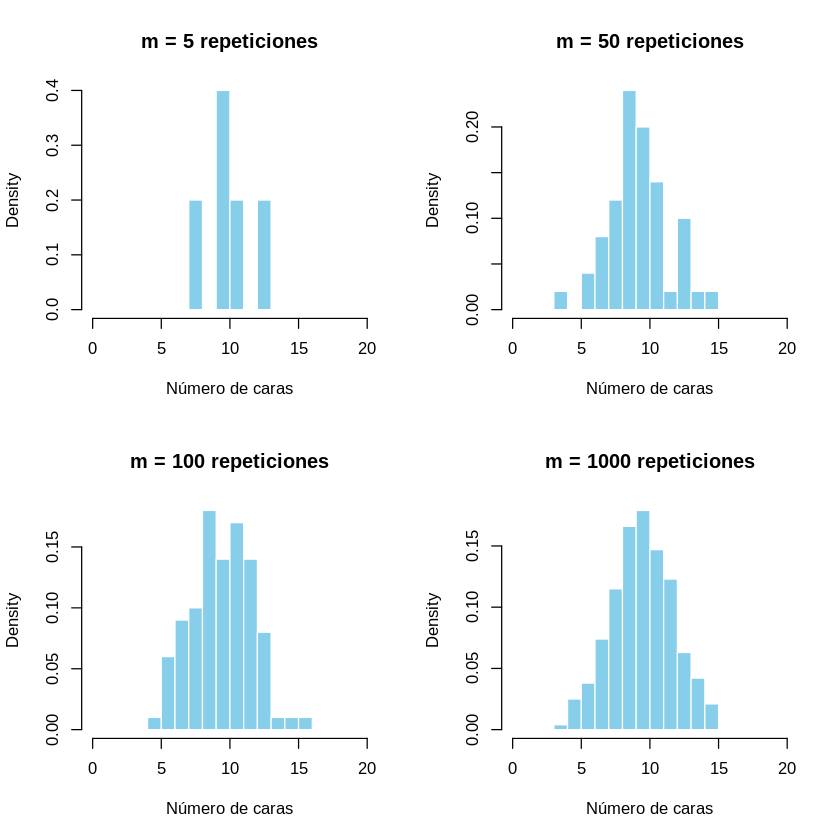

In [436]:

m_values <- c(5, 50, 100, 1000)
par(mfrow = c(2, 2))

for (m in m_values) {
  resultados <- rbinom(m, n, p)
  hist(resultados,
       breaks = seq(0, n, by = 1),
       main = paste("m =", m, "repeticiones"),
       xlab = "Número de caras",
       col = "skyblue", border = "white", prob = TRUE)
}

A partir de m = 100, la distribución toma forma simétrica, centrada cerca de 10


---



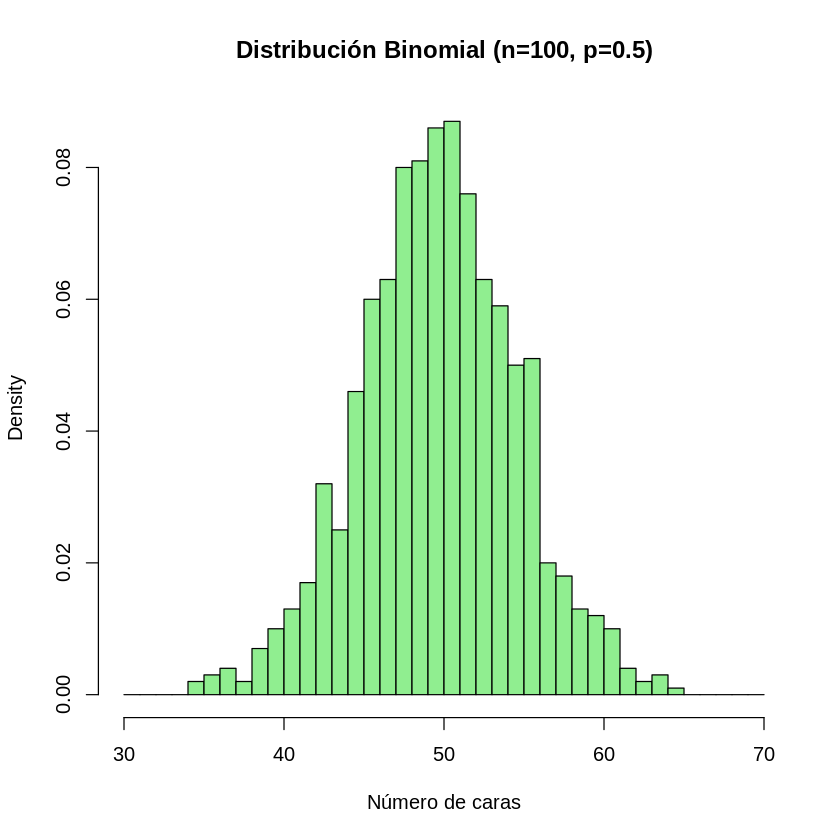

In [437]:
n2 <- 100
p2 <- 0.5
m2 <- 1000
binomial_100 <- rbinom(m2, n2, p2)


par(mfrow = c(1, 1))
hist(binomial_100,
     breaks = seq(30, 70, by = 1),
     freq = FALSE,
     col = "lightgreen",
     main = "Distribución Binomial (n=100, p=0.5)",
     xlab = "Número de caras")


Los resultados se concentran en torno a 50, con distribución simétrica y de forma acampanada

---



In [438]:
p_leq_50 <- mean(binomial_100 <= 50)
p_geq_50 <- mean(binomial_100 >= 50)
cat("P(X ≤ 50):", p_leq_50, "\n")
cat("P(X ≥ 50):", p_geq_50, "\n")

P(X ≤ 50): 0.531 
P(X ≥ 50): 0.555 


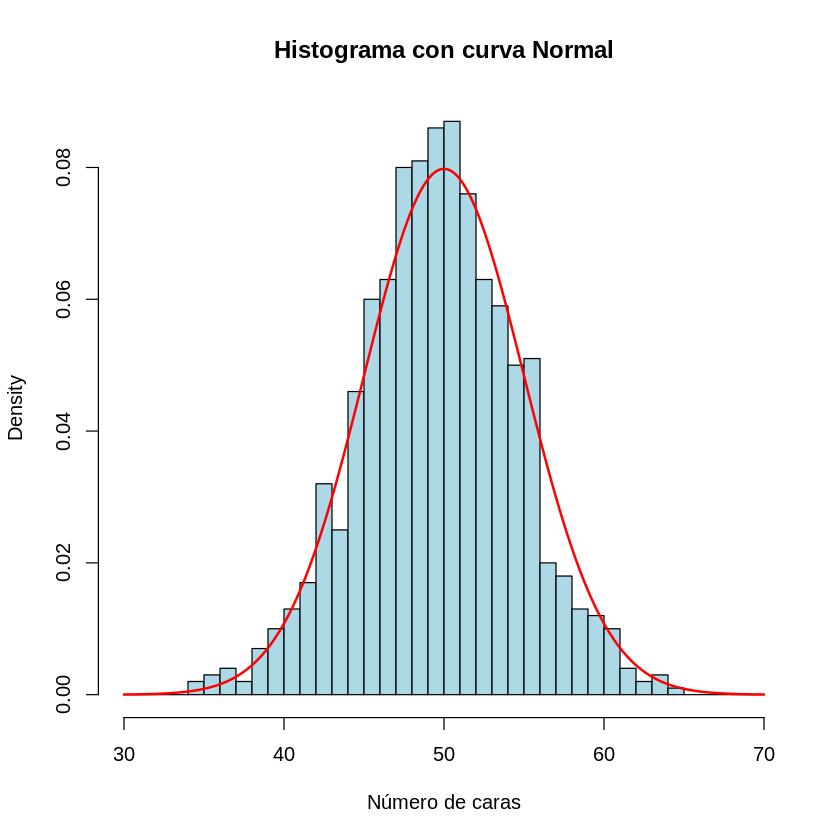

In [439]:
mu <- n2 * p2
sigma <- sqrt(n2 * p2 * (1 - p2))


hist(binomial_100,
     breaks = seq(30, 70, by = 1),
     freq = FALSE,
     col = "lightblue",
     main = "Histograma con curva Normal",
     xlab = "Número de caras")


x_vals <- seq(30, 70, length.out = 1000)
lines(x_vals, dnorm(x_vals, mean = mu, sd = sigma),
      col = "red", lwd = 2)

In [440]:
p_norm_con_cont <- pnorm(50.5, mean = mu, sd = sigma)
cat("P(X ≤ 50.5) usando normal (con corrección):", p_norm_con_cont, "\n")
cat("Diferencia con simulación P(X ≤ 50):", abs(p_norm_con_cont - p_leq_50), "\n")

P(X ≤ 50.5) usando normal (con corrección): 0.5398278 
Diferencia con simulación P(X ≤ 50): 0.008827837 


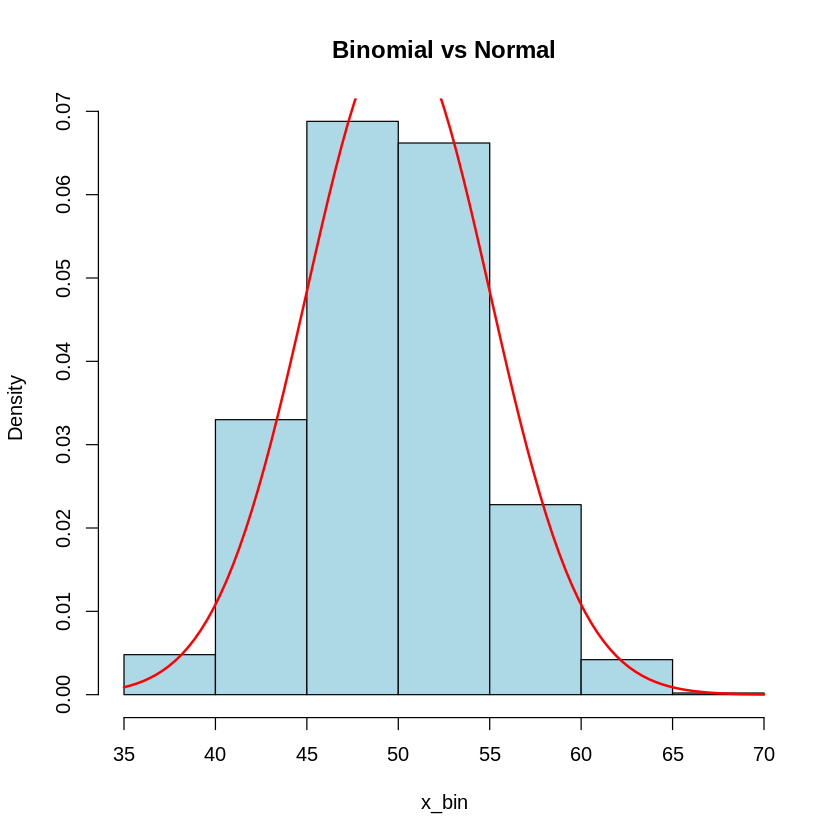

In [441]:
mu <- 100 * 0.5
sigma <- sqrt(100 * 0.5 * 0.5)
hist(x_bin, freq = FALSE, col = "lightblue", main = "Binomial vs Normal")
curve(dnorm(x, mean = mu, sd = sigma), add = TRUE, col = "red", lwd = 2)

El uso de 50.5 en lugar de 50 ajusta la diferencia entre discreto y continuo. Con esta corrección, la probabilidad normal coincide casi exactamente con la binomial.

---

In [442]:
pnorm(50.5, mean = mu, sd = sigma)

[1] 0.5398278

# Llamadas por hora en Callcenter

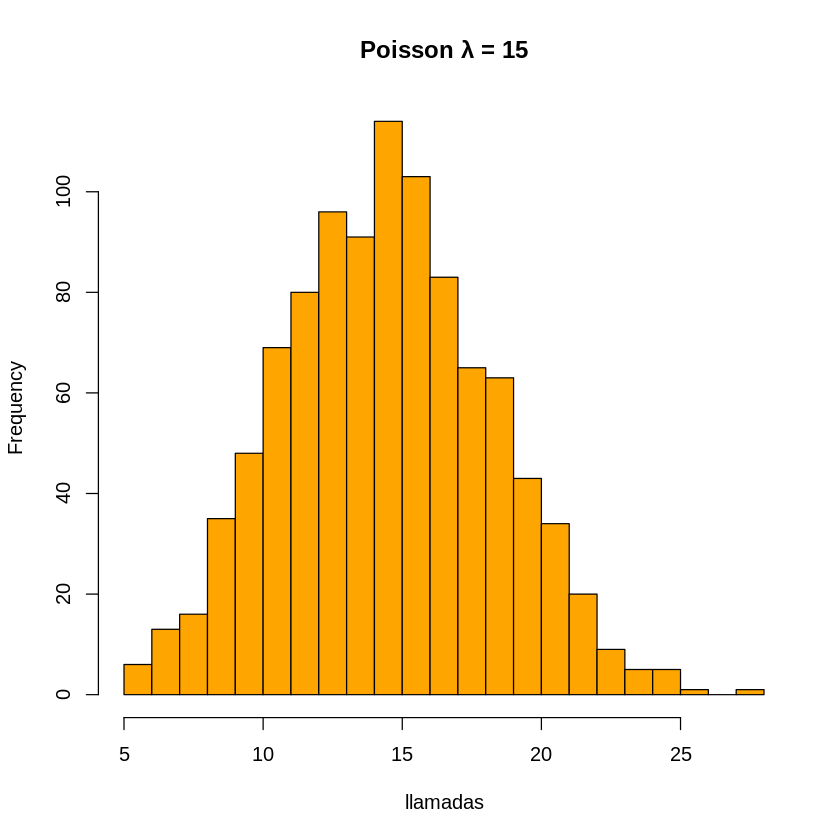

In [443]:
llamadas <- rpois(1000, lambda = 15)
hist(llamadas, col = "orange", main = "Poisson λ = 15", breaks = 20)

El histograma es asimétrico, ligeramente a la derecha, como se espera en Poisson.

---



In [444]:
p_exacta <- 1 - ppois(16, lambda = 15)

mu <- 15
sigma <- sqrt(15)
p_aprox <- 1 - pnorm(16.5, mean = mu, sd = sigma)

cat("P(X ≥ 17) exacta:", round(p_exacta, 4), "\n")
cat("P(X ≥ 17) aprox:", round(p_aprox, 4), "\n")

P(X ≥ 17) exacta: 0.3359 
P(X ≥ 17) aprox: 0.3493 


La aproximación normal subestima ligeramente, pero es cercana.

---



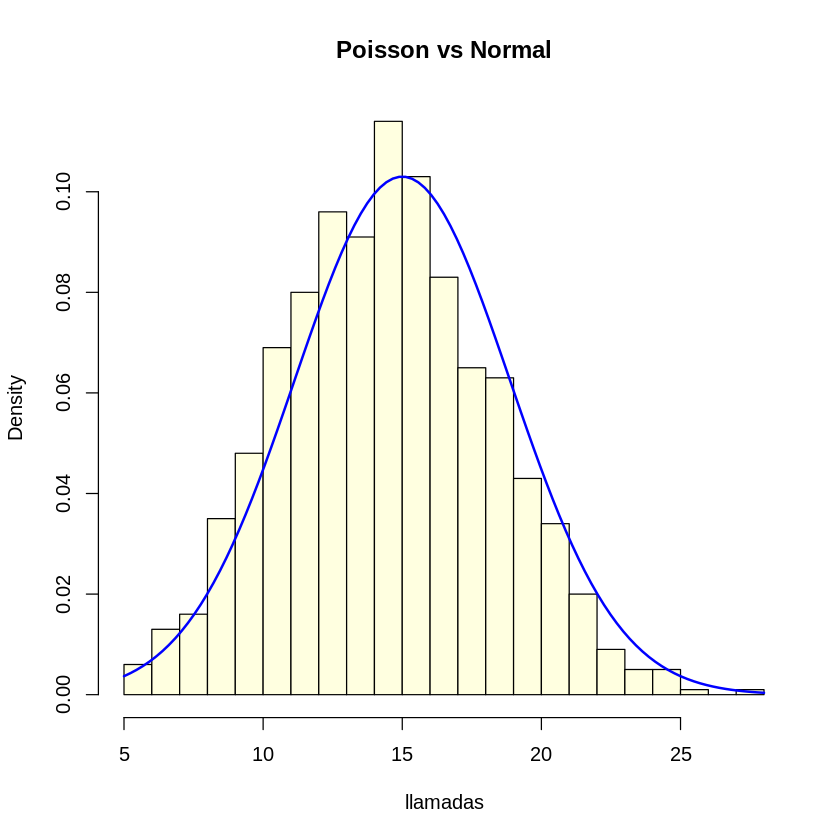

In [445]:
hist(llamadas, freq = FALSE, col = "lightyellow", breaks = 20,
     main = "Poisson vs Normal")
curve(dnorm(x, mean = mu, sd = sigma), add = TRUE, col = "blue", lwd = 2)

La curva normal se ajusta bastante bien, aunque la Poisson es más discreta

---



# Distribución Geométrica

1. La distribución geométrica modela el número de ensayos hasta el primer éxito

2. ejemplo: Cantidad de intentos hasta obtener un cliente que compre un producto

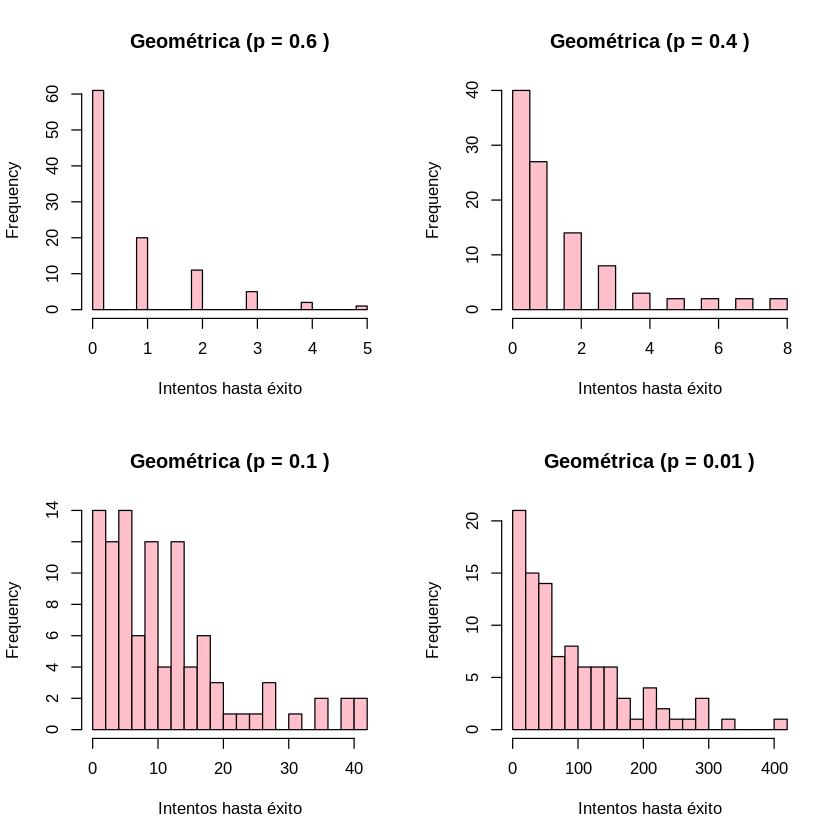

In [446]:
ps <- c(0.6, 0.4, 0.1, 0.01)

par(mfrow = c(2, 2))
for (p in ps) {
  datos <- rgeom(100, prob = p)
  hist(datos, main = paste("Geométrica (p =", p, ")"),
       col = "pink", breaks = 20, xlab = "Intentos hasta éxito")
}

Con p grande (0.6), es más probable obtener el éxito pronto, histograma concentrado en valores bajos.

Con p pequeño (0.01), el éxito tarda mucho más, histograma muy disperso y sesgado a la derecha.